<a href="https://colab.research.google.com/github/AlexeyIvanov82/Case-1-Project-AI/blob/main/Data_Science_Alexey_Ivanov_case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values:
 IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64
              IW          IF         VW          FP      Depth      Width
count  72.000000   72.000000  72.000000   72.000000  72.000000  72.000000
mean   45.666667  141.333333   8.638889   78.333333   1.195556   1.970417
std     1.678363    5.145763   2.061078   21.493530   0.225081   0.279040
min    43.000000  131.000000   4.500000   50.000000   0.800000   1.680000
25%    44.000000  139.000000   8.000000   60.000000   1.080000   1.760000
50%    45.500000  141.000000   9.000000   80.000000   1.200000   1.840000
75%    47.000000  146.000000  10.000000   80.000000   1.290000   2.050000
max    49.000000  150.000000  12.000000  125.000000   1.760000   2.600000


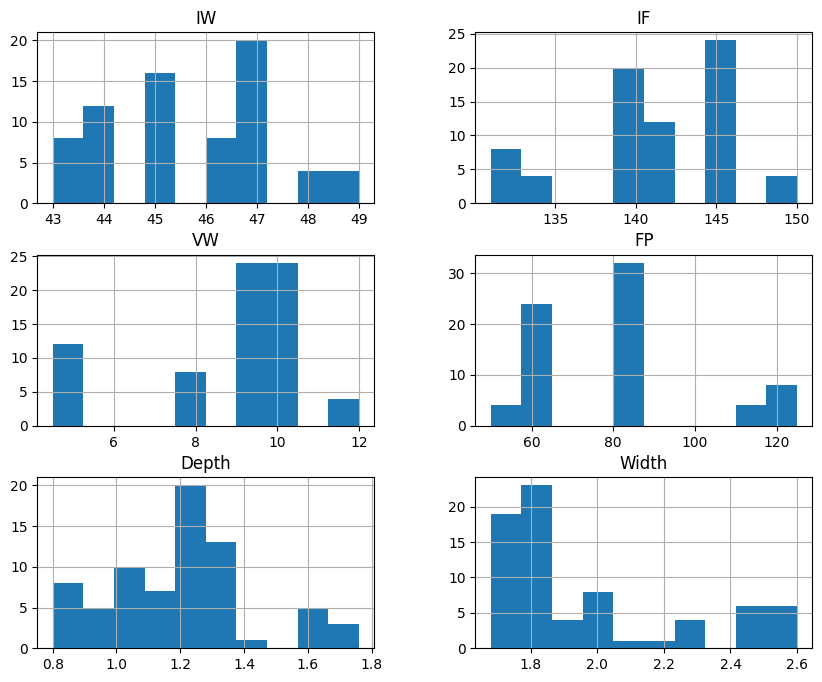

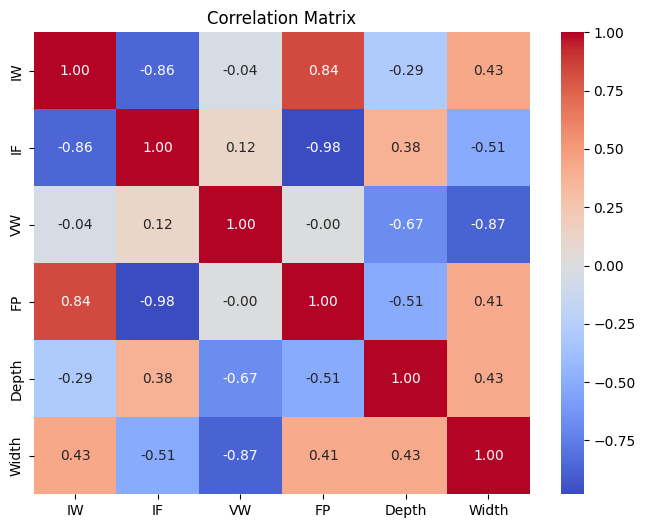

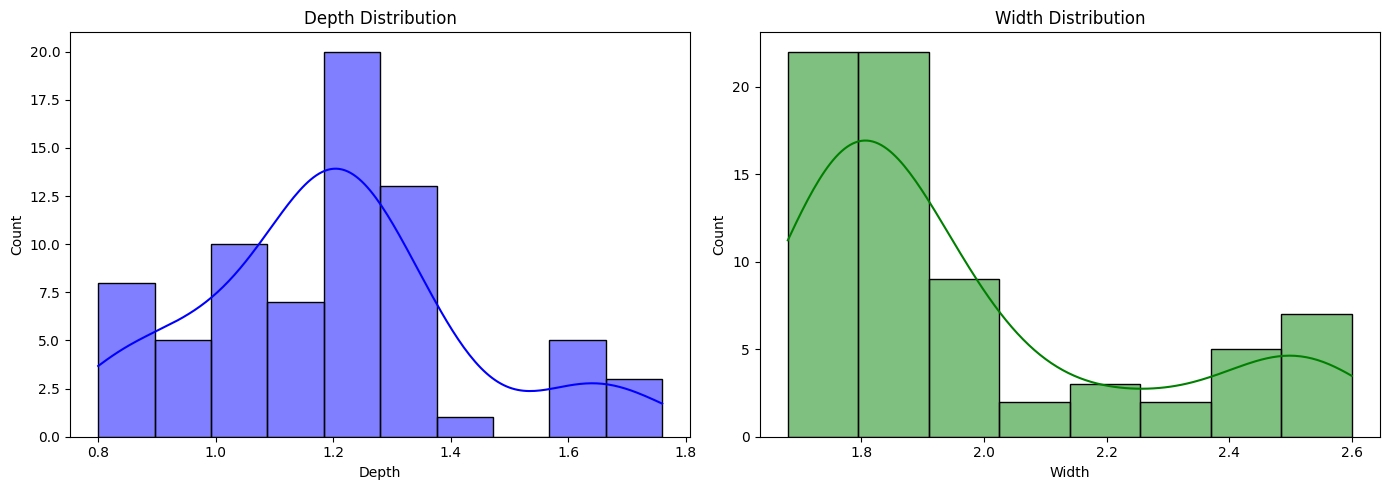

MSE for Depth Linear regression: 0.02233227825116979
MSE for Width Linear regression: 0.002293102104561906
MSE for Depth Random Forest regression: 0.007393199736116087
MSE for Width Random Forest regression: 0.001445864014882684
Coefficients (for features IW, IF, VW, FP):
 [[ 0.04599629 -0.40542071 -0.09799775 -0.55242134]
 [ 0.03982328 -0.02109094 -0.23496327  0.06218208]]


In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/ebw_data.csv')  # Dataset

# ---------- Exploratory Data Analysis (EDA) ----------

# Step 1: Check for missing values (нет пропусков)
print("Missing Values:\n", data.isnull().sum())

# Основная информация о данных

print(data.describe())

# Визуализация распределений
data.hist(figsize=(10, 8))
plt.show()

# Step 2: Generate correlation heatmap to understand relationships between variables (Тепловая карта)
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Step 3: Plot distributions of target variables (Depth, Width) (Распределение целевых переменных)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Depth'], kde=True, color='blue')
plt.title('Depth Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Width'], kde=True, color='green')
plt.title('Width Distribution')

plt.tight_layout()
plt.show()

# ---------- Data Preprocessing (Предобработка данных)----------

# Step 1: Features (X) and Targets (y)
X = data[['IW', 'IF', 'VW', 'FP']]  # Independent variables
y = data[['Depth', 'Width']]        # Dependent variables

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the scaled data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---------- Model Building (Multiple Linear Regression) (Построение модели)----------

# Step 1: Initialize and train the model
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = model_LR.predict(X_test)

# ---------- Model Evaluation (Оценка модели)----------

# Step 1: Calculate Mean Squared Error (MSE) for Depth and Width
mse_depthLR = mean_squared_error(y_test['Depth'], y_pred[:, 0])
mse_widthLR = mean_squared_error(y_test['Width'], y_pred[:, 1])

print("MSE for Depth Linear regression:", mse_depthLR)
print("MSE for Width Linear regression:", mse_widthLR)

# Initialize and train the model RF (Инициализация и обучение модели)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_depth_rf = rf.predict(X_test)
print('MSE for Depth Random Forest regression:', mean_squared_error(y_test['Depth'], pred_depth_rf[:, 0]))

rf.fit(X_train, y_train)
pred_width_rf = rf.predict(X_test)
print('MSE for Width Random Forest regression:', mean_squared_error(y_test['Width'], pred_depth_rf[:, 1]))

# ---------- Optional: Feature Importance (Coefficients) Коэффициенты----------

# Step 1: View the coefficients of the regression model
coefficients = model_LR.coef_
print("Coefficients (for features IW, IF, VW, FP):\n", coefficients)


Среднеквадратичная ошибка (MSE) (tf.keras.потери.Среднеквадратичная ошибка) и средняя абсолютная ошибка (MAE) (tf.keras.потери.MeanAbsoluteError) - это распространенные функции ошибки, используемые для задач регрессии.

Дополнительное задание: создание приложения Создать простое Flask-приложение для предсказаний глубины и ширины сварного шва по новым параметрам.

In [2]:
from flask import Flask, request, jsonify
import numpy as np

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    params = np.array([data['IW'], data['IF'], data['VW'], data['FP']]).reshape(1, -1)
    params_scaled = scaler.transform(params)

    depth_pred = rf.predict(params_scaled)
    width_pred = rf.predict(params_scaled)

    return jsonify({'Depth': depth_pred[0], 'Width': width_pred[0]})

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
